# DS 6373 - Time Series Project: Spring 2021
#### Last Modified By: David Wei
#### Last Modified Date: 2021-03-25

### Introduction
The dataset includes 19 years of Dallas Price Incidents between 2002-07-27 and 2021-03-24 provided publicly by the Dallas Police Department. It is to note that the data reflects only the preliminary information supplied to the Dallas Police Department by the reporting parties and may not be 100% accurate as it can be changed at a later date after further investigation.

Source: https://www.dallasopendata.com/Public-Safety/Police-Incidents/qv6i-rri7

In [227]:
##### importing libraries and reading in file #####
import pandas as pd
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore') #ignoring warnings
import missingno as msno

##### viz libraries #####
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

In [2]:
%%time
df_raw = pd.read_csv(r'C:\Users\David\Google Drive\Masters\Spring 2021 (ML 1 + TS)\DS 6373 - Time Series\Project\Police_Incidents.csv')
print('# of Records: '+str(len(df_raw)))
print('# of Columns: '+str(df_raw.shape[1]))

# of Records: 758094
# of Columns: 100
Wall time: 11.8 s


### EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758094 entries, 0 to 758093
Data columns (total 100 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Incident Number w/year                     758094 non-null  object 
 1   Year of Incident                           758094 non-null  int64  
 2   Service Number ID                          758094 non-null  object 
 3   Watch                                      758094 non-null  int64  
 4   Call (911) Problem                         729150 non-null  object 
 5   Type of Incident                           758094 non-null  object 
 6   Type  Location                             756893 non-null  object 
 7   Type of Property                           171481 non-null  object 
 8   Incident Address                           754884 non-null  object 
 9   Apartment Number                           165503 non-null  object 
 10  Reporti

**Unique 'Victime Race' attributes**

In [4]:
df_raw['Victim Race'].unique()

array([nan, 'Black', 'White', 'Hispanic or Latino', 'Middle Eastern',
       'Unknown', 'Asian', 'Non-Hispanic or Latino',
       'Native Hawaiian/Pacific Islander',
       'American Indian or Alaska Native', 'NH', 'H', 'TEST'],
      dtype=object)

**Unique 'Type of Incident' attributes**

In [5]:
df_type_of_incident = df_raw['Type of Incident']
types_of_incidents = list(set(df_type_of_incident))
print(len(types_of_incidents))
print('='*80)
print(types_of_incidents)

1114
['ASSAULT (AGG) -(SBI) - TRAFFIC - RECKLESS DRIVING', 'THEFT OF PROP >$100 BUT <$750 ENH -SHOPLIFT - NOT BY EMP', 'EVADING ARREST DETENTION CAUSE SBI PC38.04(b2B)', 'INSURANCE FRAUD W/INT TO DEFRAUD/DECEIVE', 'MAN DEL CONT SUB PEN GRP 3/4 <28G', 'PROHIBITED WEAPON/WEAPONS FREE ZONE IA', 'THEFT OF PROP (ATT) > OR EQUAL $1,500 BUT <$20K (NOT EMP', 'TERRORISTIC THREAT REACTION EMERGENCY AGENCY', 'THEFT OF PROP > OR EQUAL $30K<$150K- NOT SHOPLIFT', 'MISAPP FIDUC/FINAN PROP > OR EQUAL $30K < $150K', 'THEFT OF PROP > OR EQUAL $100 <$750 (SHOPLIFT-NOT EMP) PC31.03(e2A)', 'THEFT ORG RETAIL -(BY EMP) >$1500<$20,000', 'ASSAULT -VERBAL THREAT', 'FRAUD DELIVERS PRESCRIPTION FORMS SCHEDULE II CONT SUBS', 'THEFT OF PROP (ATT) <$50 ENH (NOT EMPLOYEE)', 'ACCIDENT INVOLVING SERIOUS BODILY INJURY', 'TRAF VIO -DISPLAY FICTITIOUS LICENSE PLATE', 'FALSE ID AS POLICE OFFICER', 'EVADING ARREST DETENTION W/VEH OR WATERCRAFT', 'BURGLARY OF BUILDING - NO FORCED ENTRY', 'CRIM MISCHIEF IMP/INT PUB SERVICE < 

**Viewing top 50 crime incidents**

In [7]:
pd.set_option('display.max_rows', 100)
type_count = df_raw.groupby(['Type of Incident']).size().sort_values(ascending=False)
type_count = type_count.iloc[0:50,]
type_count

Type of Incident
BMV                                                                   83610
UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE                            36478
FOUND PROPERTY (NO OFFENSE)                                           27245
BURGLARY OF HABITATION - FORCED ENTRY                                 25865
PUBLIC INTOXICATION                                                   22761
BURGLARY OF BUILDING - FORCED ENTRY                                   21841
ABANDONED PROPERTY (NO OFFENSE)                                       20279
CRIMINAL TRESPASS WARNING                                             19262
CRIM MISCHIEF > OR EQUAL $100 < $750                                  18318
ROBBERY OF INDIVIDUAL (AGG)                                           17130
CRIM MISCHIEF >OR EQUAL $100 BUT <$750                                16678
UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS                          14964
ASSAULT -OFFENSIVE CONTACT                                            1

**Viewing Range of Dates**

In [ ]:
print(min(df_raw['Date of Report']))
print(max(df_raw['Date of Report']))

### Feature Reduction

In [30]:
col_names = ['Service Number ID','Type of Incident','Date of Report','Victim Age','Victim Gender','Victim Race']
df_raw_subbed = df_raw[col_names]
print(df_raw_subbed.info())
print('='*80)
df_raw_subbed.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758094 entries, 0 to 758093
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Service Number ID  758094 non-null  object 
 1   Type of Incident   758094 non-null  object 
 2   Date of Report     758094 non-null  object 
 3   Victim Age         441752 non-null  float64
 4   Victim Gender      474674 non-null  object 
 5   Victim Race        477822 non-null  object 
dtypes: float64(1), object(5)
memory usage: 34.7+ MB
None


,Service Number ID,Type of Incident,Date of Report,Victim Age,Victim Gender,Victim Race
0,003862-2021-01,PUBLIC INTOXICATION,2021-01-07 03:00:00.0000000,NaN,NaN,NaN
1,003828-2021-01,PUBLIC INTOXICATION,2021-01-06 23:31:00.0000000,NaN,NaN,NaN
2,003827-2021-01,INJURED PERSON- PUBLIC PROPERTY (OTHER THAN FI...,2021-01-07 00:20:00.0000000,38.0,Male,Black
3,003837-2021-01,PUBLIC INTOXICATION,2021-01-07 00:20:00.0000000,NaN,NaN,NaN
4,035860-2019-01,BMV,2019-02-21 20:26:00.0000000,40.0,Female,White


### Cleaning Empty Data

In [31]:
len(df_raw_subbed)

758094

In [32]:
df_clean1 = df_raw_subbed[df_raw_subbed['Victim Gender'].isna() == False]
print(len(df_clean1))
print('='*80)
df_clean2 = df_clean1[df_clean1['Victim Race'].isna() == False]
print(len(df_clean2))
print('='*80)
df_clean3 = df_clean1[df_clean1['Victim Age'].isna() == False]
print(len(df_clean3))
print('='*80)
df_cleaned = df_clean3.copy()
print(len(df_cleaned))

474674
474349
440444
440444


**Visualizing Attributes after Removing all Empty data**

Wall time: 431 ms


<AxesSubplot:>

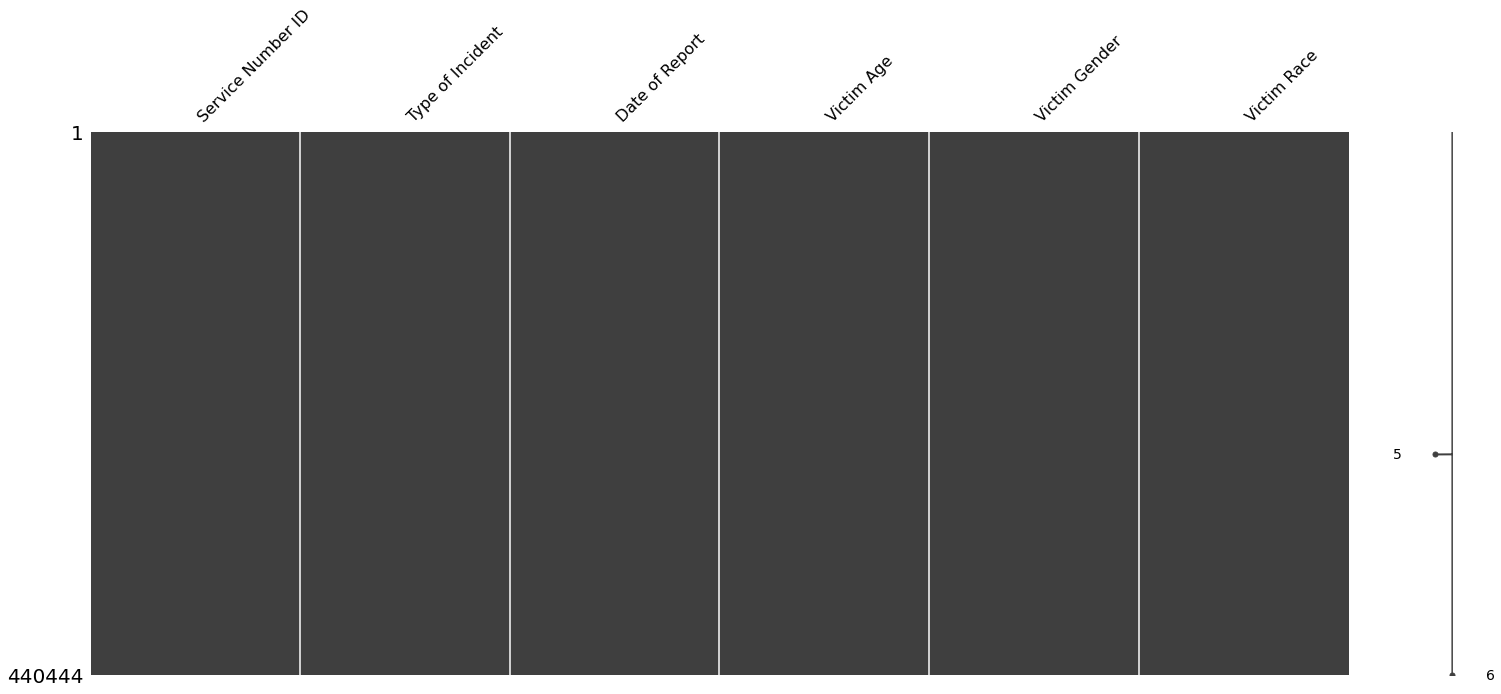

In [33]:
%%time
msno.matrix(df_cleaned)

### Transforming

Defining 'Violent Crimes' as 'MANSLAUGHTER', 'MURDER', 'KILLING', 'HOMICIDE', 'RAPE', 'ARMED ROBBERY', 'AGGRAVATED ASSAULT' 

In [ ]:
# #violent_crimes = ['MANSLAUGHTER', 'MURDER', 'KILLING', 'HOMICIDE', 'RAPE', 'ARMED ROBBERY', 'AGGRAVATED ASSAULT', 'ASSAULT (AGG)']
# violent_crimes = ['ASSAULT (AGG)']
# crime_count = df_type_of_incident[df_type_of_incident.isin(violent_crimes)]
# len(crime_count)

Filtering data to exclude all non-violent crimes

In [ ]:
# pd.set_option('display.max_rows', 50)

# df_filtered = df_raw[df_raw['Type of Incident'].isin(violent_crimes)]
# print(len(df_filtered))
# print('='*80)
# print(df_filtered, 5)

**Luckily since the data provided a primary index (Service Number ID), we can safely assume that all the date times 'HH:MM:SS' can be removed safely**

In [35]:
print(df_cleaned['Service Number ID'].is_unique)
del df_cleaned['Service Number ID']
print(df_cleaned.dtypes)

Type of Incident     object
Date of Report       object
Victim Age          float64
Victim Gender        object
Victim Race          object
dtype: object


**Converting 'Date of Report' timestamp based date column to a 'Date' type column**

In [36]:
df_cleaned['Date of Report'] = pd.to_datetime(df_cleaned['Date of Report'])
print('"Date of Report" type: ',str(df_cleaned['Date of Report'].dtypes))
print('='*80)

#converting YYYY-MM-DD HH:MM:SS to YYYY-MM-DD format
df_cleaned['Date'] = df_cleaned['Date of Report'].dt.date
print('"Date type": ',str(df_cleaned['Date'].dtypes))
print('='*80)

#converting Date object type to date type
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%Y-%m-%d')
print('"Date type": ',str(df_cleaned['Date'].dtypes))
print(df_cleaned['Date'], 1)
print('='*80)

#removing the original 'Date of Report'
del df_cleaned['Date of Report']
print(df_cleaned.dtypes)

"Date of Report" type:  datetime64[ns]
"Date type":  object
"Date type":  datetime64[ns]
2        2021-01-07
4        2019-02-21
5        2019-05-23
6        2020-02-29
8        2019-04-03
            ...    
758083   2016-10-16
758086   2016-11-20
758088   2017-08-04
758089   2017-07-30
758090   2016-12-12
Name: Date, Length: 440444, dtype: datetime64[ns] 1
Type of Incident            object
Victim Age                 float64
Victim Gender               object
Victim Race                 object
Date                datetime64[ns]
dtype: object


### One-Hot Encoding - Gender

**Further data cleaning to remove all gender's that is not either 'Male' or 'Female'**

In [83]:
df_cleaned['Victim Gender'].unique()

array(['Male', 'Female', 'Unknown', 'TEST'], dtype=object)

In [49]:
gender_exclude = ['TEST', 'Unknown']
gender_cleaned = df_cleaned[~df_cleaned['Victim Gender'].isin(gender_exclude)]
print(len(gender_cleaned))
print('='*80)
print(gender_cleaned['Victim Gender'].unique())
print('='*80)
print(gender_cleaned.info())

440184
['Male' 'Female']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 440184 entries, 2 to 758090
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Type of Incident  440184 non-null  object        
 1   Victim Age        440184 non-null  float64       
 2   Victim Gender     440184 non-null  object        
 3   Victim Race       440183 non-null  object        
 4   Date              440184 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 20.2+ MB
None


**one-hot encoding Gender**

In [55]:
one_hot_gender = pd.get_dummies(gender_cleaned['Victim Gender'])
one_hot_gender.head(1)

,Female,Male
2,0,1


**ading one-hot encoded back to df**

In [69]:
#joins one-hot encoded to df
df_gender_cleaned = gender_cleaned.join(one_hot_gender)

#removes boolean value 'Victim Gender'
del df_gender_cleaned['Victim Gender']

#let's also remove 'Type of Incident' as we will be doing forecasting on ALL crimes
del df_gender_cleaned['Type of Incident']

#renaming attributes
df_gender_cleaned = df_gender_cleaned.rename(columns={'Male': 'Victim_Male', 'Female': 'Victim_Female'})
print(df_gender_cleaned.head(1))
print('='*80)
print(df_gender_cleaned.info())

   Victim Age Victim Race       Date  Victim_Female  Victim_Male
2        38.0       Black 2021-01-07              0            1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 440184 entries, 2 to 758090
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Victim Age     440184 non-null  float64       
 1   Victim Race    440183 non-null  object        
 2   Date           440184 non-null  datetime64[ns]
 3   Victim_Female  440184 non-null  uint8         
 4   Victim_Male    440184 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), object(1), uint8(2)
memory usage: 34.3+ MB
None


### Integer-Encoding - Race

In [88]:
race_count = df_gender_cleaned.groupby(['Victim Race']).size().sort_values(ascending=False)
race_count = race_count.iloc[0:50,]
race_count

Victim Race
Black                               153298
Hispanic or Latino                  138808
White                               132218
Asian                                 7276
Middle Eastern                        5895
Unknown                               1502
American Indian or Alaska Native       601
Native Hawaiian/Pacific Islander       532
NH                                      43
TEST                                     6
H                                        4
dtype: int64

**removing outlier Race types**

In [89]:
race_exclude = ['NH', 'TEST', 'H', 'Unknown']
race_exclude = df_gender_cleaned[~df_gender_cleaned['Victim Race'].isin(race_exclude)]
print(len(df_cleaned))
print('='*80)
print(race_exclude['Victim Race'].unique())
print('='*80)
print(race_exclude.info())

440444
['Black' 'White' 'Hispanic or Latino' 'Middle Eastern' 'Asian'
 'Native Hawaiian/Pacific Islander' 'American Indian or Alaska Native' nan]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 438629 entries, 2 to 758090
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Victim Age     438629 non-null  float64       
 1   Victim Race    438628 non-null  object        
 2   Date           438629 non-null  datetime64[ns]
 3   Victim_Female  438629 non-null  uint8         
 4   Victim_Male    438629 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), object(1), uint8(2)
memory usage: 14.2+ MB
None


In [109]:
df_race_cleaned = race_exclude.dropna(subset=['Victim Race'])
print(len(df_race_cleaned))
print('='*80)
print(df_race_cleaned['Victim Race'].unique())

438628
['Black' 'White' 'Hispanic or Latino' 'Middle Eastern' 'Asian'
 'Native Hawaiian/Pacific Islander' 'American Indian or Alaska Native']


**finally integer encoding Race after further cleaning outlier and empty values from attribute**

In [110]:
le = preprocessing.LabelEncoder()
df_race_cleaned['Victim Race_num'] = le.fit_transform(df_race_cleaned['Victim Race'])
print(df_race_cleaned.head(5))

   Victim Age Victim Race       Date  Victim_Female  Victim_Male  \
2        38.0       Black 2021-01-07              0            1   
4        40.0       White 2019-02-21              1            0   
5        21.0       Black 2019-05-23              1            0   
6        82.0       White 2020-02-29              1            0   
8        74.0       White 2019-04-03              1            0   

   Victim Race_num  
2                2  
4                6  
5                2  
6                6  
8                6  


**creating x-ref for race integer to the desc**

In [121]:
df_race_cleaned.groupby(['Victim Race_num']).size().sort_values(ascending=False)

Victim Race_num
2    153298
3    138808
6    132218
1      7276
4      5895
0       601
5       532
dtype: int64

In [133]:
df_race_cleaned.groupby(['Victim Race']).size().sort_values(ascending=False)

Victim Race
Black                               153298
Hispanic or Latino                  138808
White                               132218
Asian                                 7276
Middle Eastern                        5895
American Indian or Alaska Native       601
Native Hawaiian/Pacific Islander       532
dtype: int64

Race Index - Description:

1 -  Asian<br>
2 - Black<br>
3 - Hispanic or Latino <br>
4 - Middle Eastern<br>
5 - Native Hawaiian/Pacific Islander <br>
6 - White

#### Visualizing on a daily basis, the amount of crime victims per race.
In descending order of # of crime victims:
1. Black
2. Hispanic or Latino
3. White
4. Asian

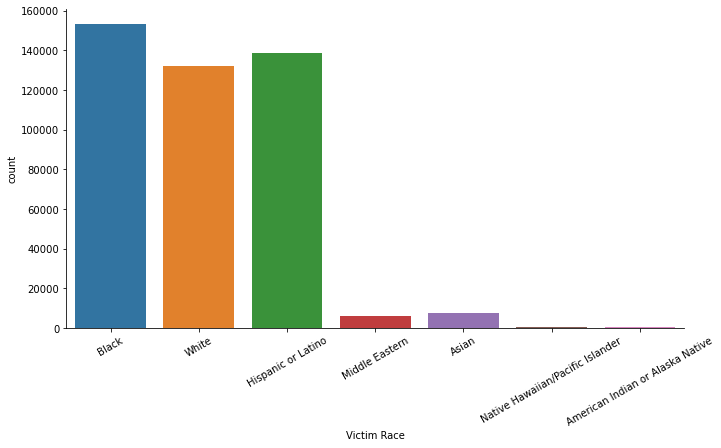

In [230]:
victim_race_plot = sns.catplot(x='Victim Race', kind="count",data=df_race_cleaned,height=5, aspect=2,legend=False)
victim_race_plot.set_xticklabels(rotation=30)

#### Creating Final Dataframe for Aggregation

In [145]:
df_cleaned_final = df_race_cleaned.copy()
print(df_cleaned_final.head(1))

#removing Victim race descriptoin
del df_cleaned_final['Victim Race']

#renaming the Victim Race Int to 'Victim_Race'
df_cleaned_final = df_cleaned_final.rename(columns={'Victim Race_num': 'Victim_Race', 'Victim Age': 'Victim_Age'})

#re-ordering df
df_cleaned_final = df_cleaned_final[['Date', 'Victim_Age', 'Victim_Race', 'Victim_Female', 'Victim_Male']]
df_cleaned_final.set_index('Date')
print(df_cleaned_final.info())

   Victim Age Victim Race       Date  Victim_Female  Victim_Male  \
2        38.0       Black 2021-01-07              0            1   

   Victim Race_num  
2                2  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 438628 entries, 2 to 758090
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           438628 non-null  datetime64[ns]
 1   Victim_Age     438628 non-null  float64       
 2   Victim_Race    438628 non-null  int32         
 3   Victim_Female  438628 non-null  uint8         
 4   Victim_Male    438628 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int32(1), uint8(2)
memory usage: 12.5 MB
None


### Aggregating and Creating Time Series based Data

#### 1. Creating aggregated dataframe for Crime Counts

In [146]:
df_cleaned_final.head(1)

,Date,Victim_Age,Victim_Race,Victim_Female,Victim_Male
2,2021-01-07,38.0,2,0,1


In [164]:
len(df_cleaned_final)

438628

In [169]:
pd.set_option('display.max_rows', 2550)

crime_count = df_cleaned_final.groupby(['Date']).size().to_frame('Tot_Crime_Count').reset_index().sort_values(['Date'], ascending=[False])
print(crime_count.head(1))
print('='*80)
print('total # of records: ',str(len(crime_count)))
print('='*80)
print('Is Date unique? :',str(crime_count['Date'].is_unique))

           Date  Tot_Crime_Count
2530 2021-03-24                3
total # of records:  2531
Is Date unique? : True


#### 2. Creating aggregated dataframe for Victim Gender

In [175]:
victim_gender_sum = df_cleaned_final.groupby(['Date']).agg({'Victim_Female': 'sum', 'Victim_Male': 'sum'})
print(victim_gender_sum.head(5))
print('='*80)
print('total # of records: ',str(len(victim_gender_sum)))

            Victim_Female  Victim_Male
Date                                  
2002-07-27              0            1
2008-08-12              1            0
2012-02-11              1            0
2013-05-22              1            1
2013-06-14              1            0
total # of records:  2531


#### 3. Creating aggregated dataframe for Average Victim Age

In [214]:
victim_age_mean = df_cleaned_final.groupby(['Date']).agg({'Victim_Age': 'mean'})
victim_age_mean['Victim_Age'] = victim_age_mean['Victim_Age'] .round(2)
print(victim_age_mean.head(5))
print('='*80)
print('total # of records: ',str(len(victim_age_mean)))

            Victim_Age
Date                  
2002-07-27        21.0
2008-08-12        29.0
2012-02-11        28.0
2013-05-22        43.5
2013-06-14        37.0
total # of records:  2531


#### 4. Creating aggregated dataframe for Most Occuring (Mode) Victim Race

In [206]:
victim_race_mode = df_cleaned_final.groupby(['Date']).agg(lambda x:x.value_counts().index[0])
victim_race_mode = victim_race_mode.drop(['Victim_Female', 'Victim_Male','Victim_Age'], axis=1)
print(victim_race_mode.head(5))
print('='*80)
print('total # of records: ',str(len(victim_race_mode)))

            Victim_Race
Date                   
2002-07-27            2
2008-08-12            6
2012-02-11            6
2013-05-22            2
2013-06-14            6
total # of records:  2531


#### Joining all aggregate dataframes into final df

In [215]:
print(len(crime_count))
print('all df same # of rows?: ',str(len(crime_count)==len(victim_gender_sum)==len(victim_age_mean)==len(victim_race_mode)))

2531
all df same # of rows?:  True


In [216]:
df_final = crime_count.merge(victim_gender_sum, how='left', left_on=['Date'], right_on=['Date']).merge(victim_age_mean, how='left', left_on=['Date'], right_on=['Date']).merge(victim_race_mode, how='left', left_on=['Date'], right_on=['Date'])
print('total # of records: ',str(len(df_final)))
print(df_final.info())

total # of records:  2531
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2531 non-null   datetime64[ns]
 1   Tot_Crime_Count  2531 non-null   int64         
 2   Victim_Female    2531 non-null   uint8         
 3   Victim_Male      2531 non-null   uint8         
 4   Victim_Age       2531 non-null   float64       
 5   Victim_Race      2531 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), uint8(2)
memory usage: 93.9 KB
None


#### View and then export cleaned and aggregated data as csv

In [232]:
df_final = df_final.sort_values(by=['Date'], ascending=True)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 2530 to 0
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2531 non-null   datetime64[ns]
 1   Tot_Crime_Count  2531 non-null   int64         
 2   Victim_Female    2531 non-null   uint8         
 3   Victim_Male      2531 non-null   uint8         
 4   Victim_Age       2531 non-null   float64       
 5   Victim_Race      2531 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), uint8(2)
memory usage: 93.9 KB
None


In [226]:
df_final.head(5)

,Date,Tot_Crime_Count,Victim_Female,Victim_Male,Victim_Age,Victim_Race
2530,2002-07-27,1,0,1,21.0,2
2529,2008-08-12,1,1,0,29.0,6
2528,2012-02-11,1,1,0,28.0,6
2527,2013-05-22,2,1,1,43.5,2
2526,2013-06-14,1,1,0,37.0,6


In [225]:
df_final.to_csv(r'C:\Users\David\Google Drive\Masters\Spring 2021 (ML 1 + TS)\DS 6373 - Time Series\Project\DallasCrime_Agg.csv',index=False, header=True)